In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
# CSV functions
def csv_to_dict(file):
    """
    read CSV file and create dict with key for each head containing a list of column entries for respective head
    
    :param file: path to CSV file to read
    :return: created dictionary
    """
    d = {}
    with open(file) as fin:
        reader = csv.reader(fin)
        headers = next(reader, None)
        for h in headers:
            d[h] = []
        for row in reader:
            for h, entry in zip(headers,row):
                d[h].append(entry)
    return d


def print_csv_dict(d):
    """
    print CSV dictionary in formatted way
    
    :param d: dict of CSV file to print
    :return:
    """
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(d)

In [3]:
# IMU data dict functions
def extract_acc(d):
    """
    extract acceleration vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: acc_x, acc_y, acc_z (numpy arrays)
    """
    acc_x = np.array(d['arx'], dtype='float32')
    acc_y = np.array(d['ary'], dtype='float32')
    acc_z = np.array(d['arz'], dtype='float32')
    return acc_x, acc_y, acc_z


def extract_corr_acc(d):
    """
    extract corrected acceleration vectors for IMU data run dict (subtracted gravity average)
    
    :param d: dict of CSV file of IMU data run
    :return: acc_cx, acc_cy, acc_cz (numpy arrays)
    """
    acc_cx = np.array(d['acx'], dtype='float32')
    acc_cy = np.array(d['acy'], dtype='float32')
    acc_cz = np.array(d['acz'], dtype='float32')
    return acc_cx, acc_cy, acc_cz

def extract_vel(d):
    """
    extract velocity vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: vel_x, vel_y, vel_z (numpy arrays)
    """
    vel_x = np.array(d['vx'], dtype='float32')
    vel_y = np.array(d['vy'], dtype='float32')
    vel_z = np.array(d['vz'], dtype='float32')
    return vel_x, vel_y, vel_z

def extract_pos(d):
    """
    extract position vectors for IMU data run dict
    
    :param d: dict of CSV file of IMU data run
    :return: pos_x, pos_y, pos_z (numpy arrays)
    """
    pos_x = np.array(d['sx'], dtype='float32')
    pos_y = np.array(d['sy'], dtype='float32')
    pos_z = np.array(d['sz'], dtype='float32')
    return pos_x, pos_y, pos_z

In [12]:
# read all IMU files
imu_data = []
for run in range(7):
    run_name = 'run' + str(run + 1)
    run_data_file = 'elevator_measurements/' + '/imu1_' + run_name + '_data.csv'
    run_dict = csv_to_dict(run_data_file)
    imu_data.append(run_dict)

Run 1
Max height: 41.539200m


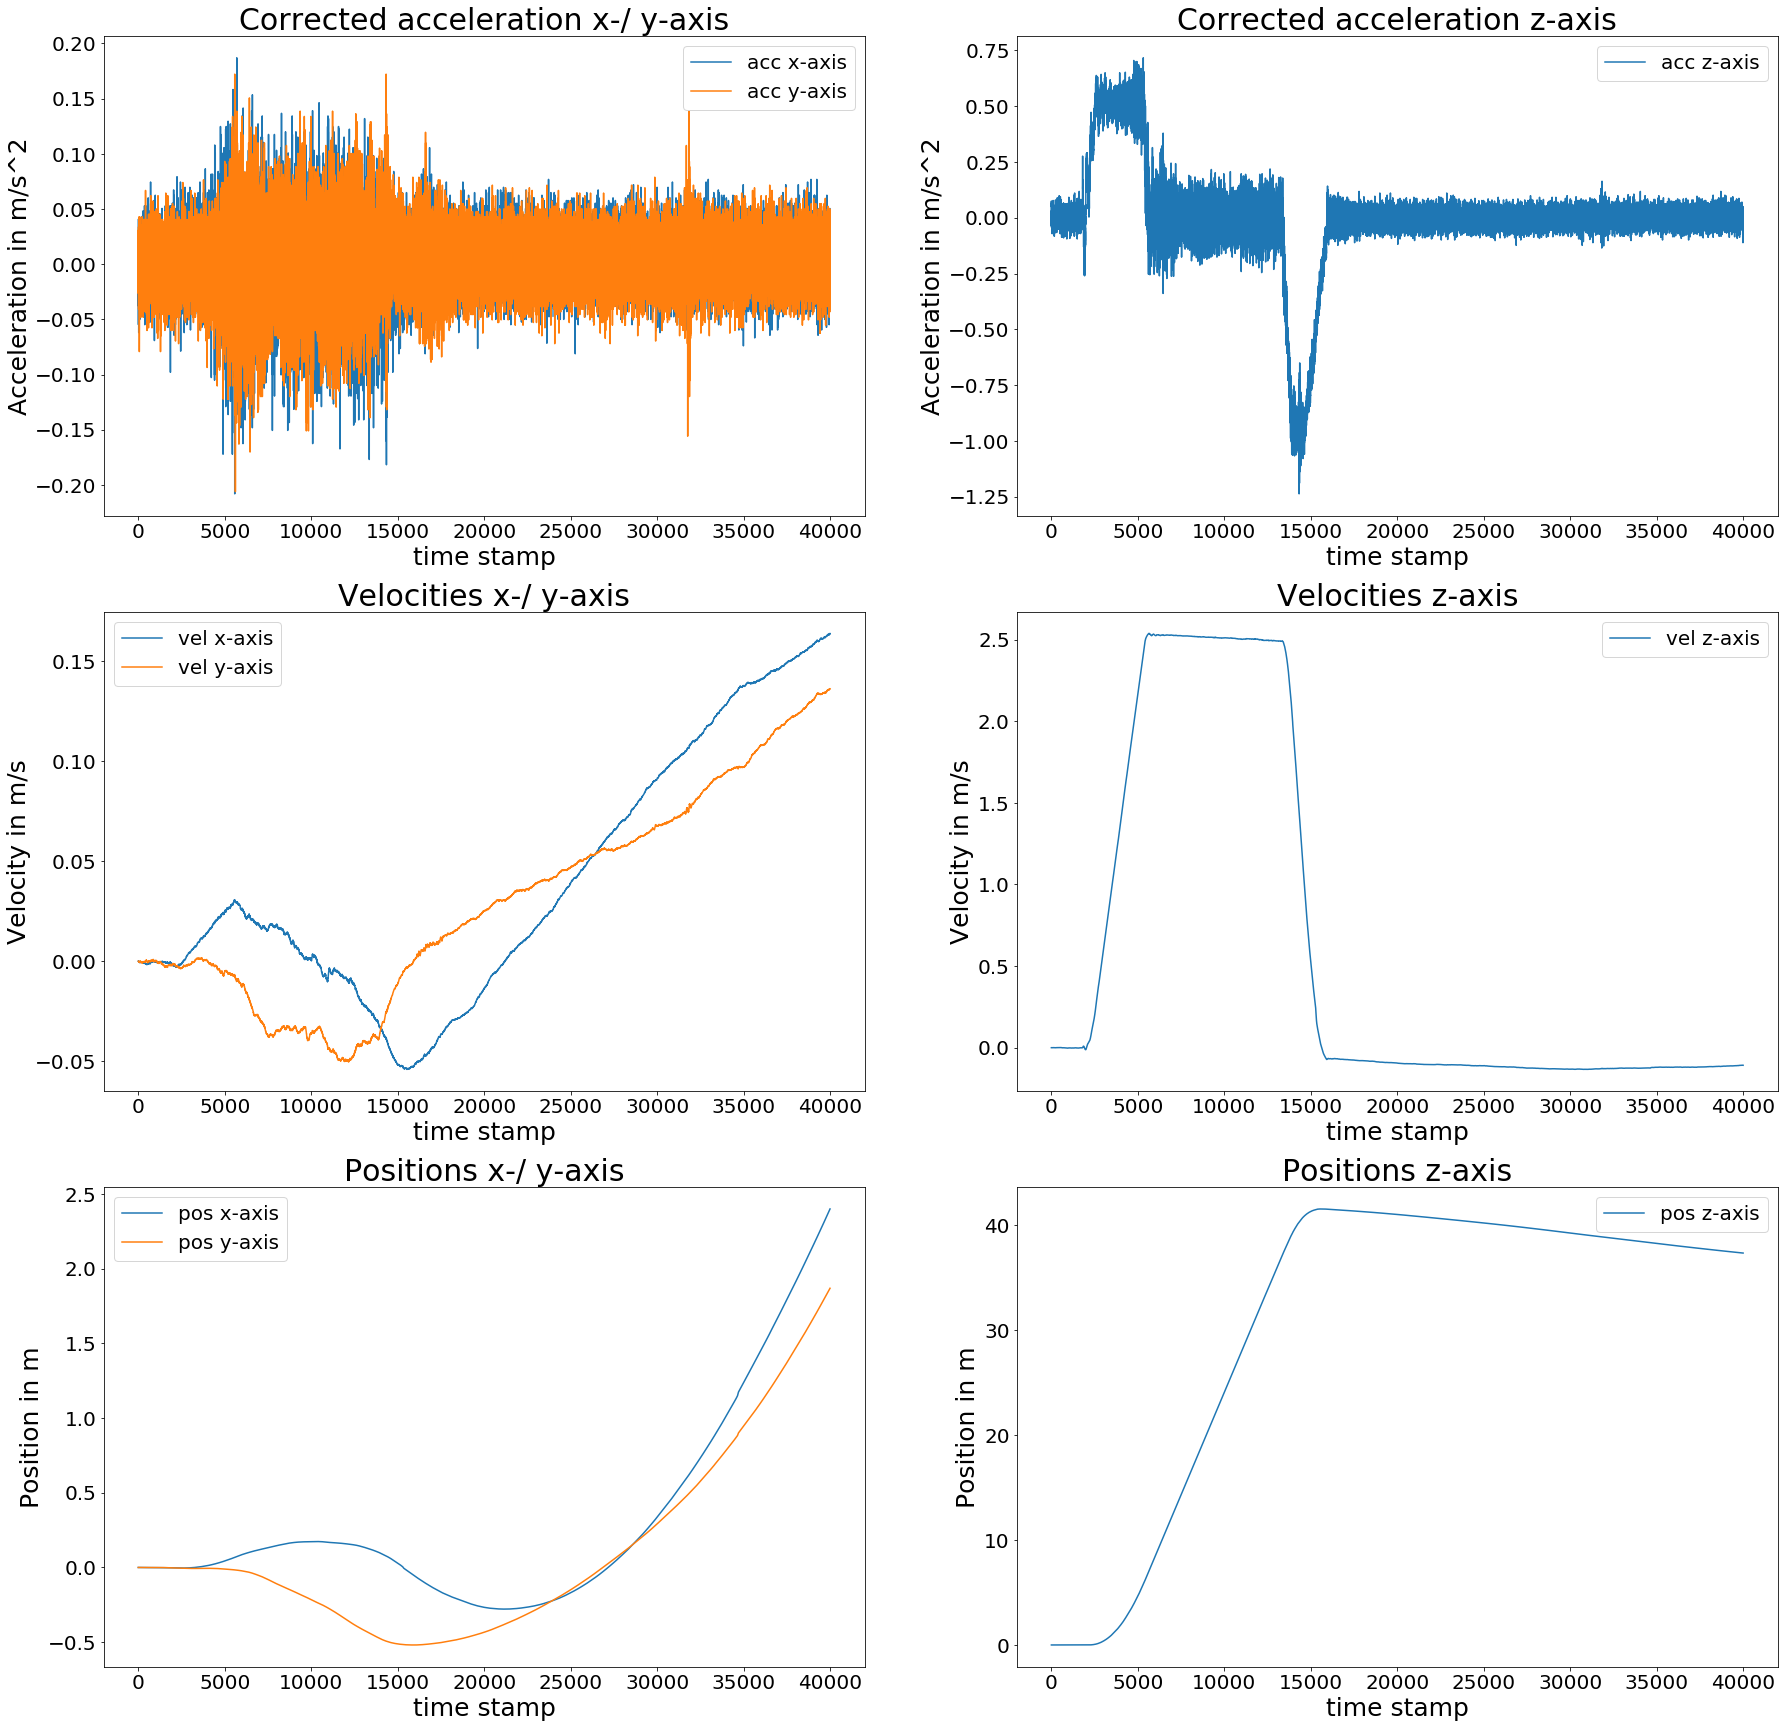

Run 2
Max height: 41.589100m


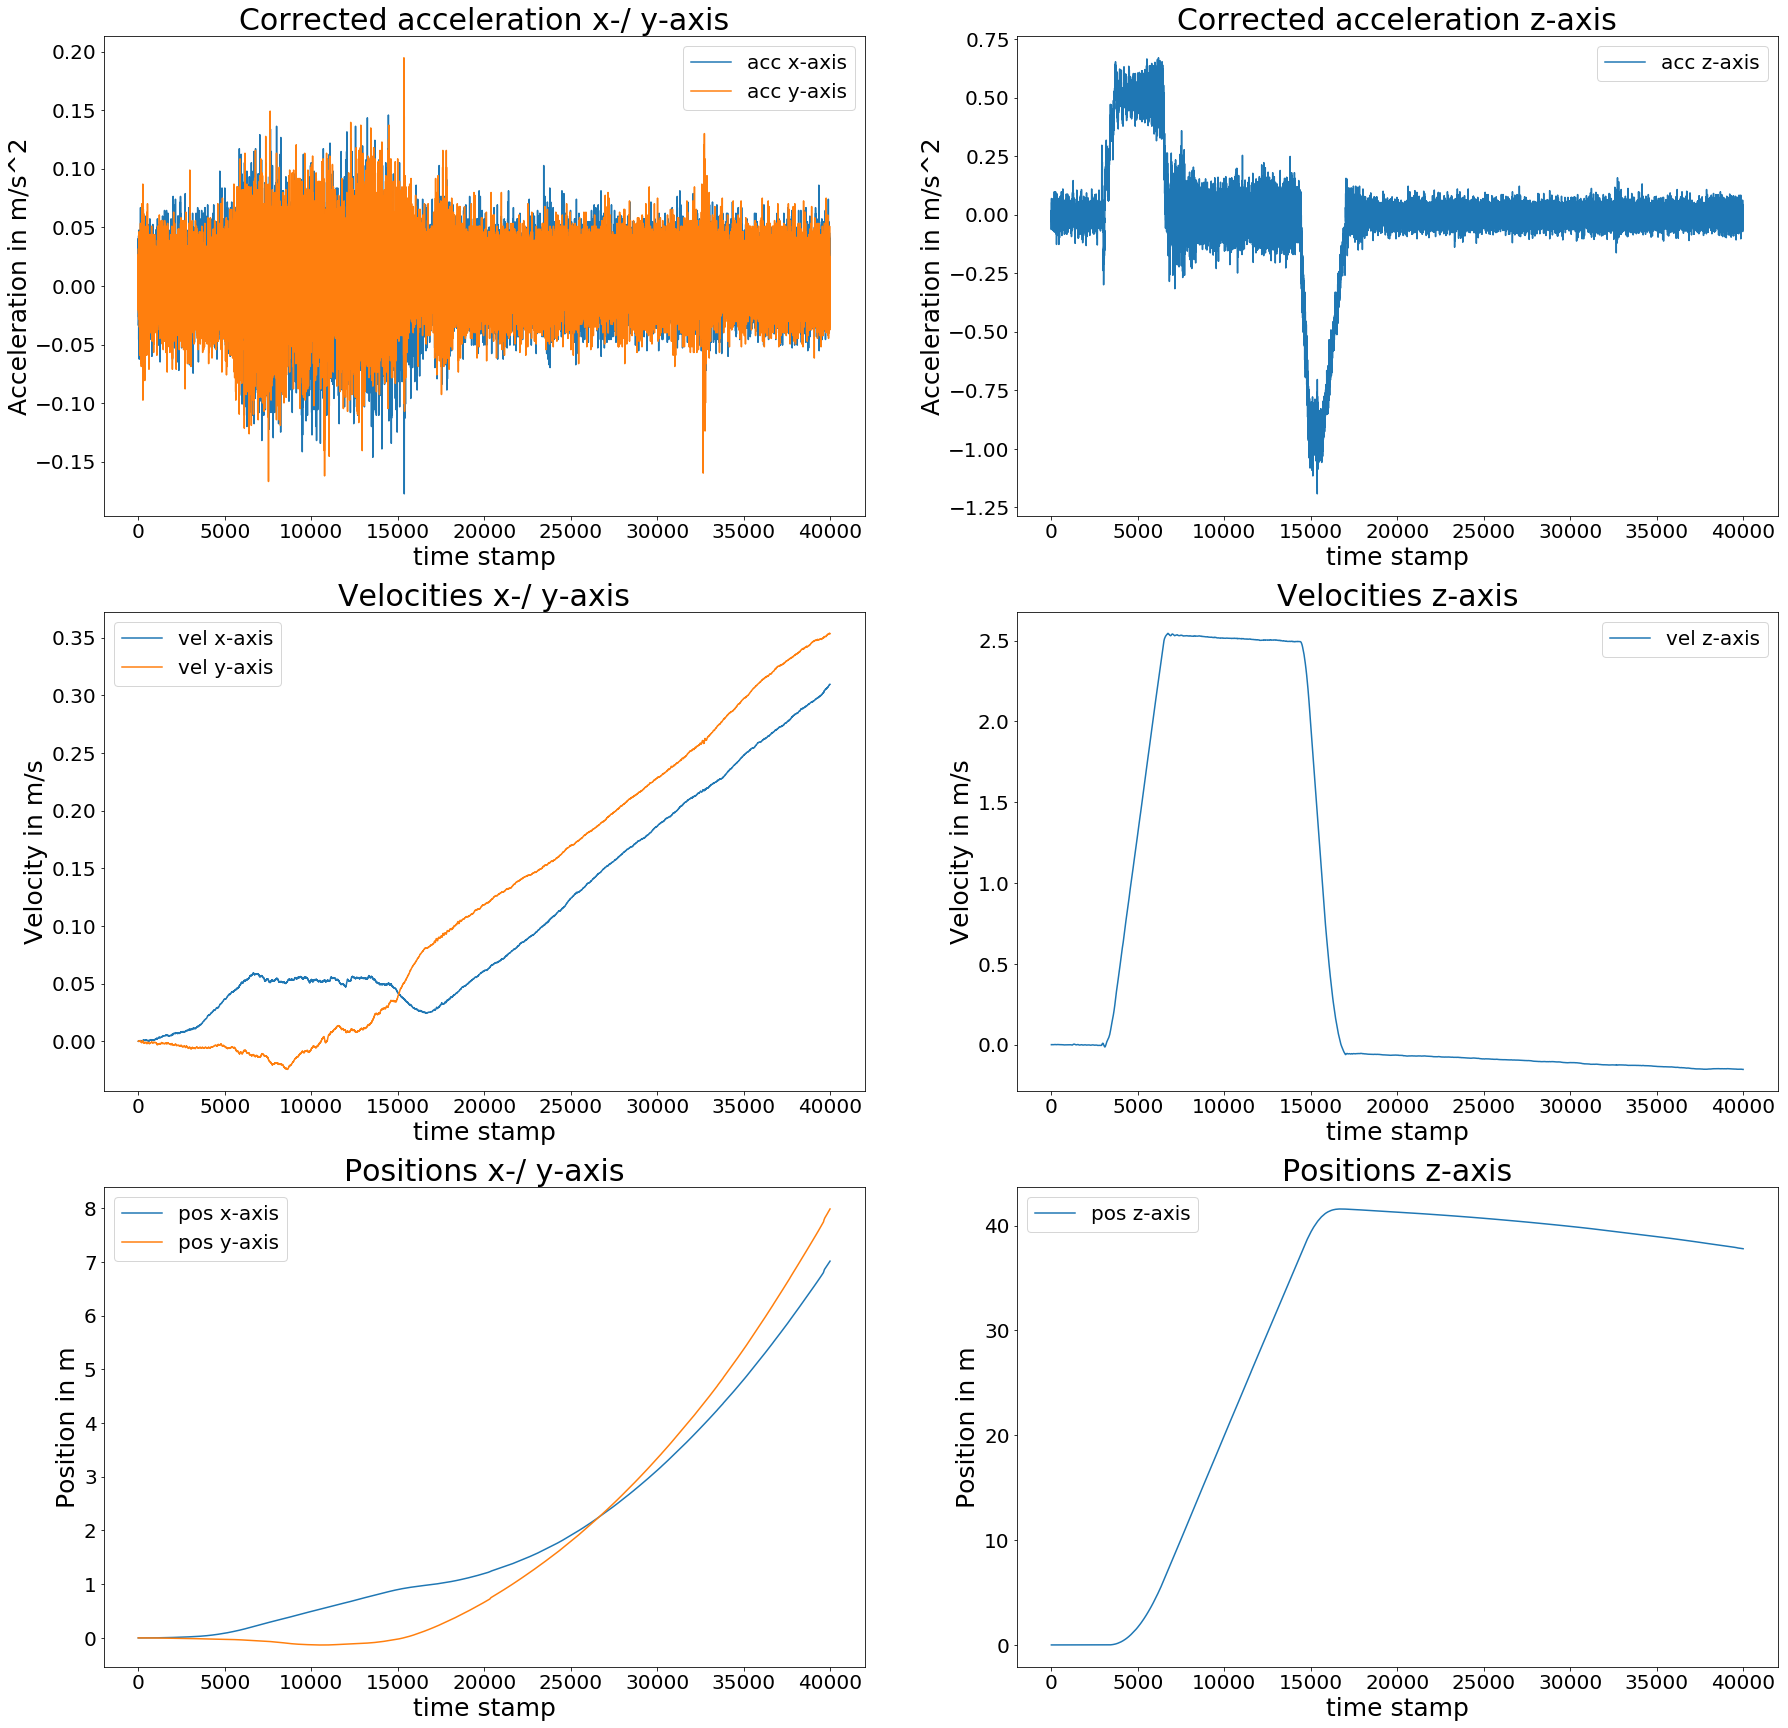

Run 3
Max height: 40.349201m


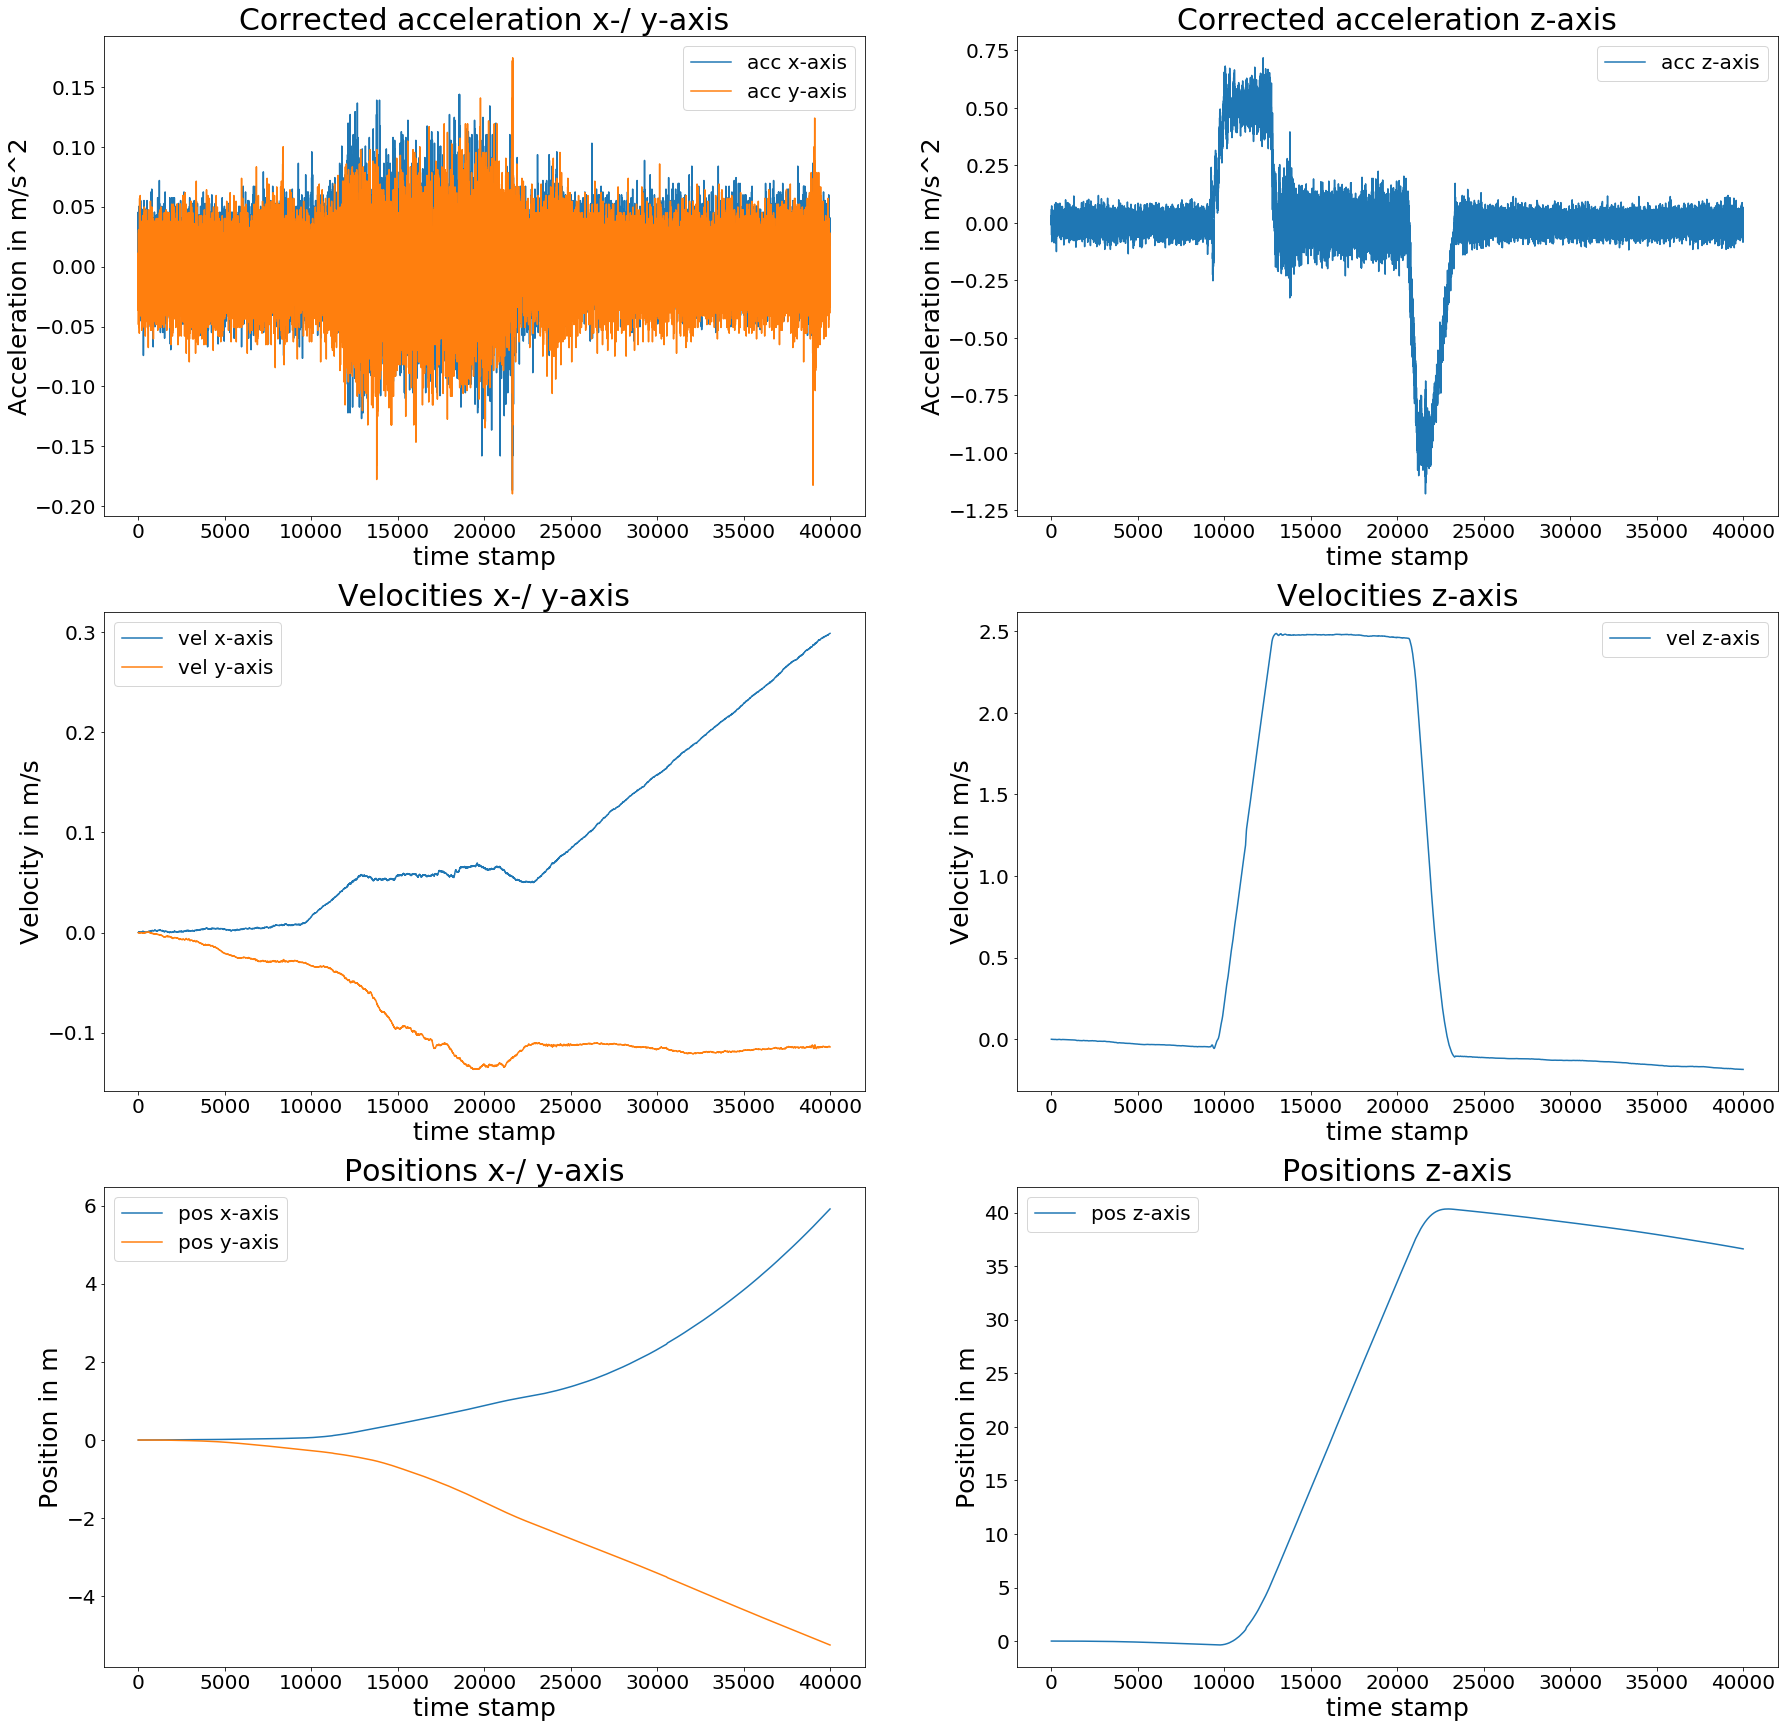

Run 4
Max height: 41.967400m


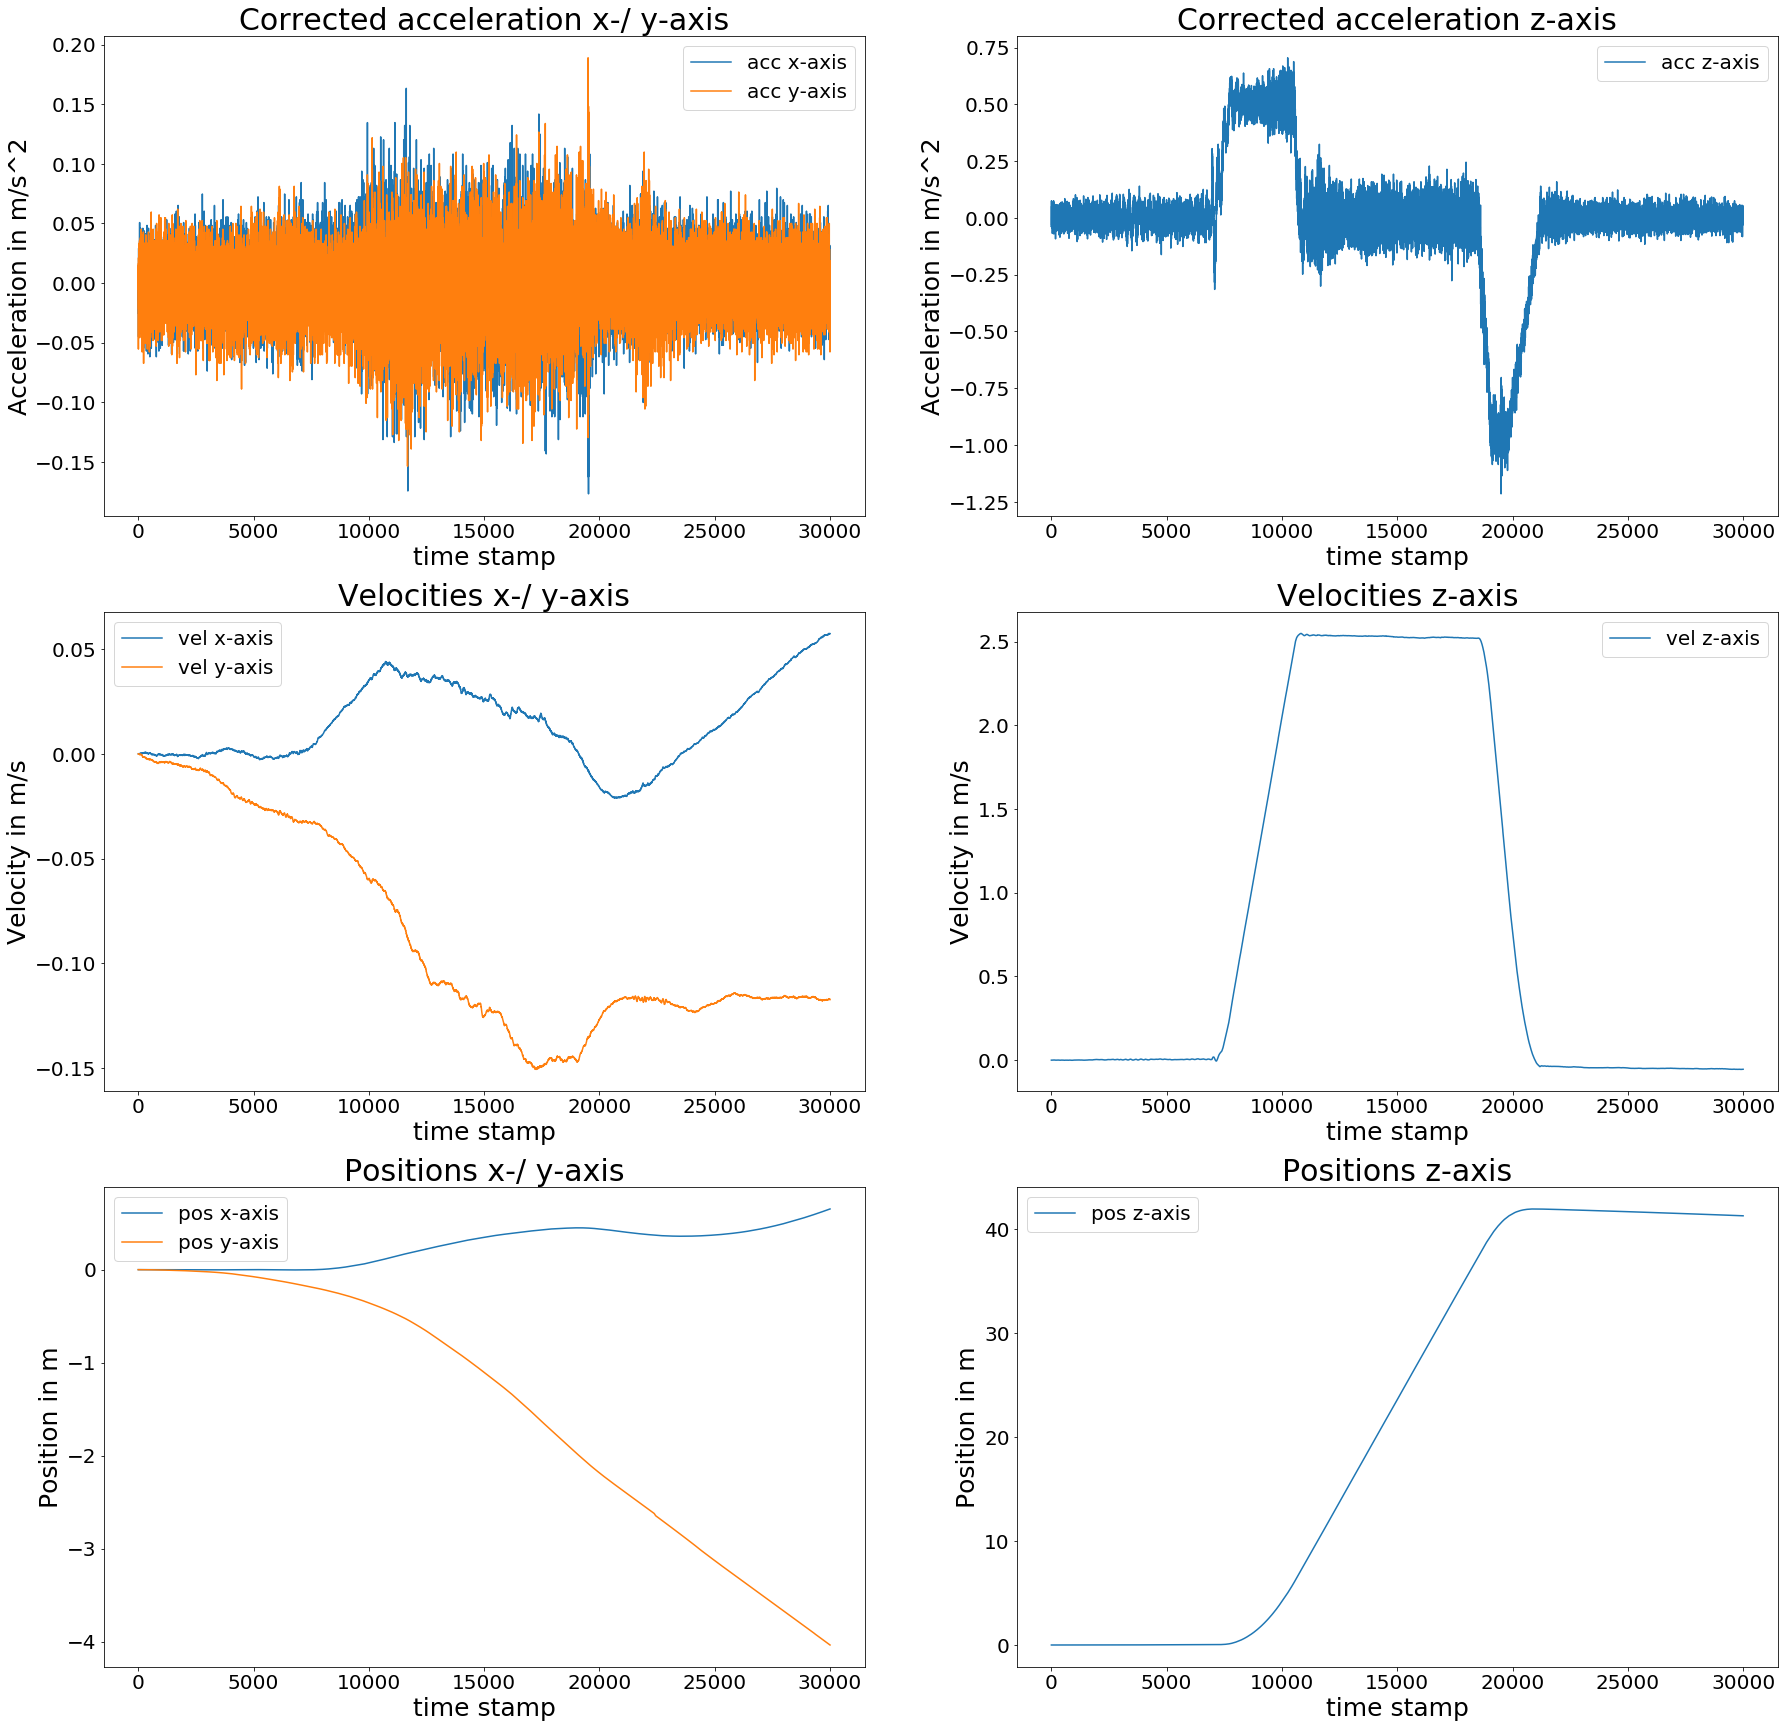

Run 5
Max height: 41.241699m


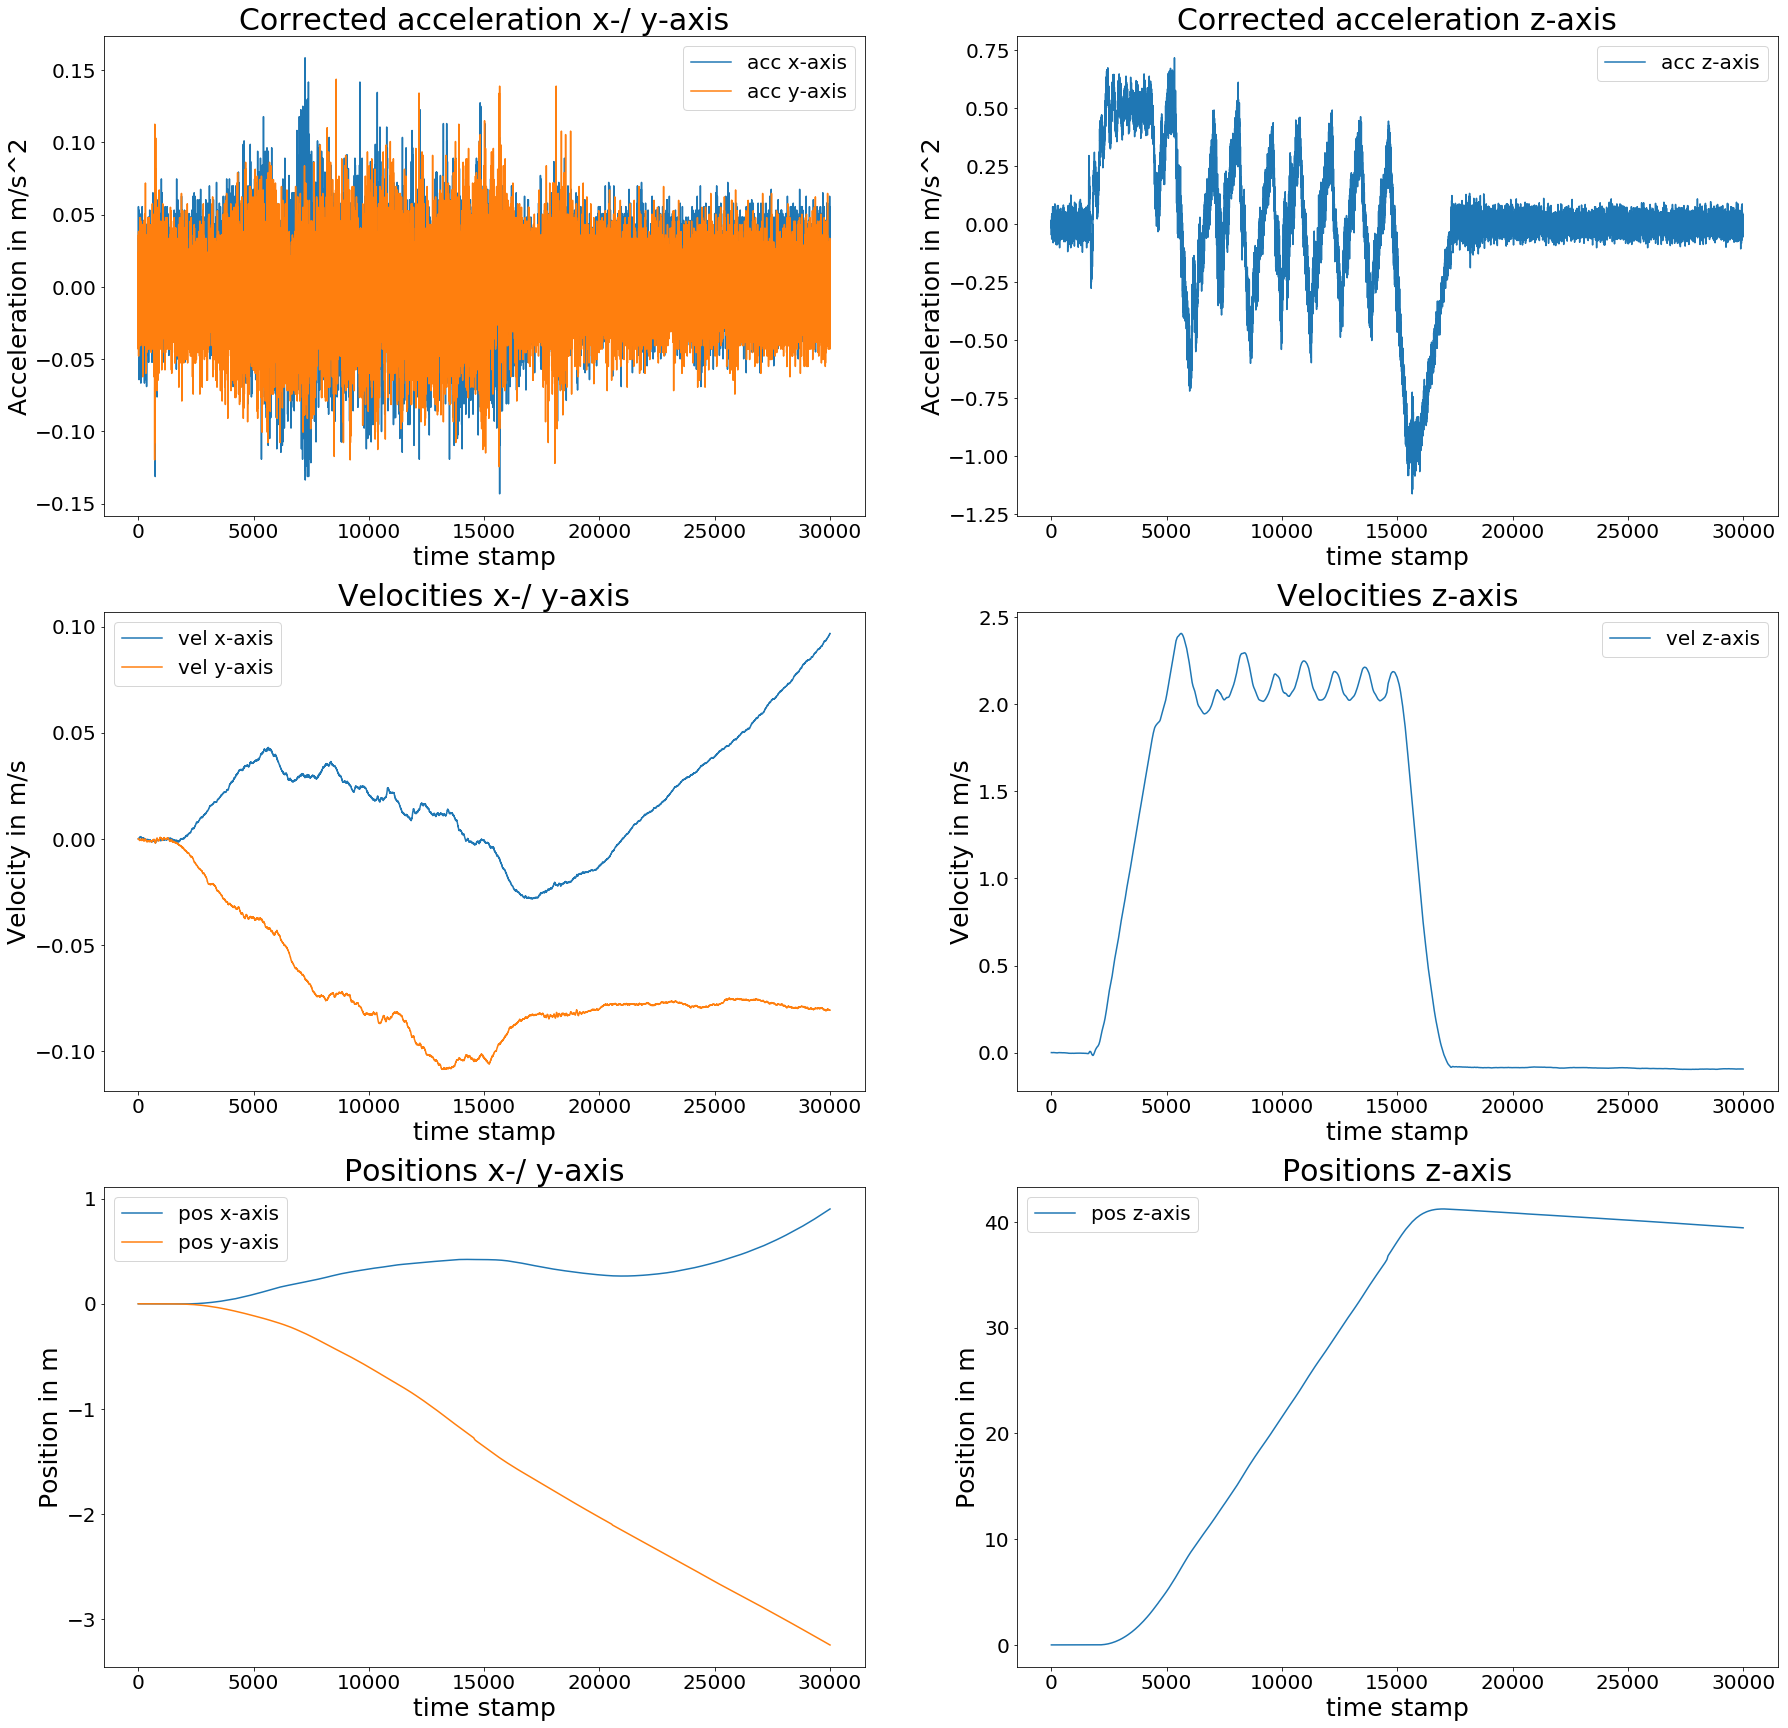

Run 6
Max height: 38.993900m


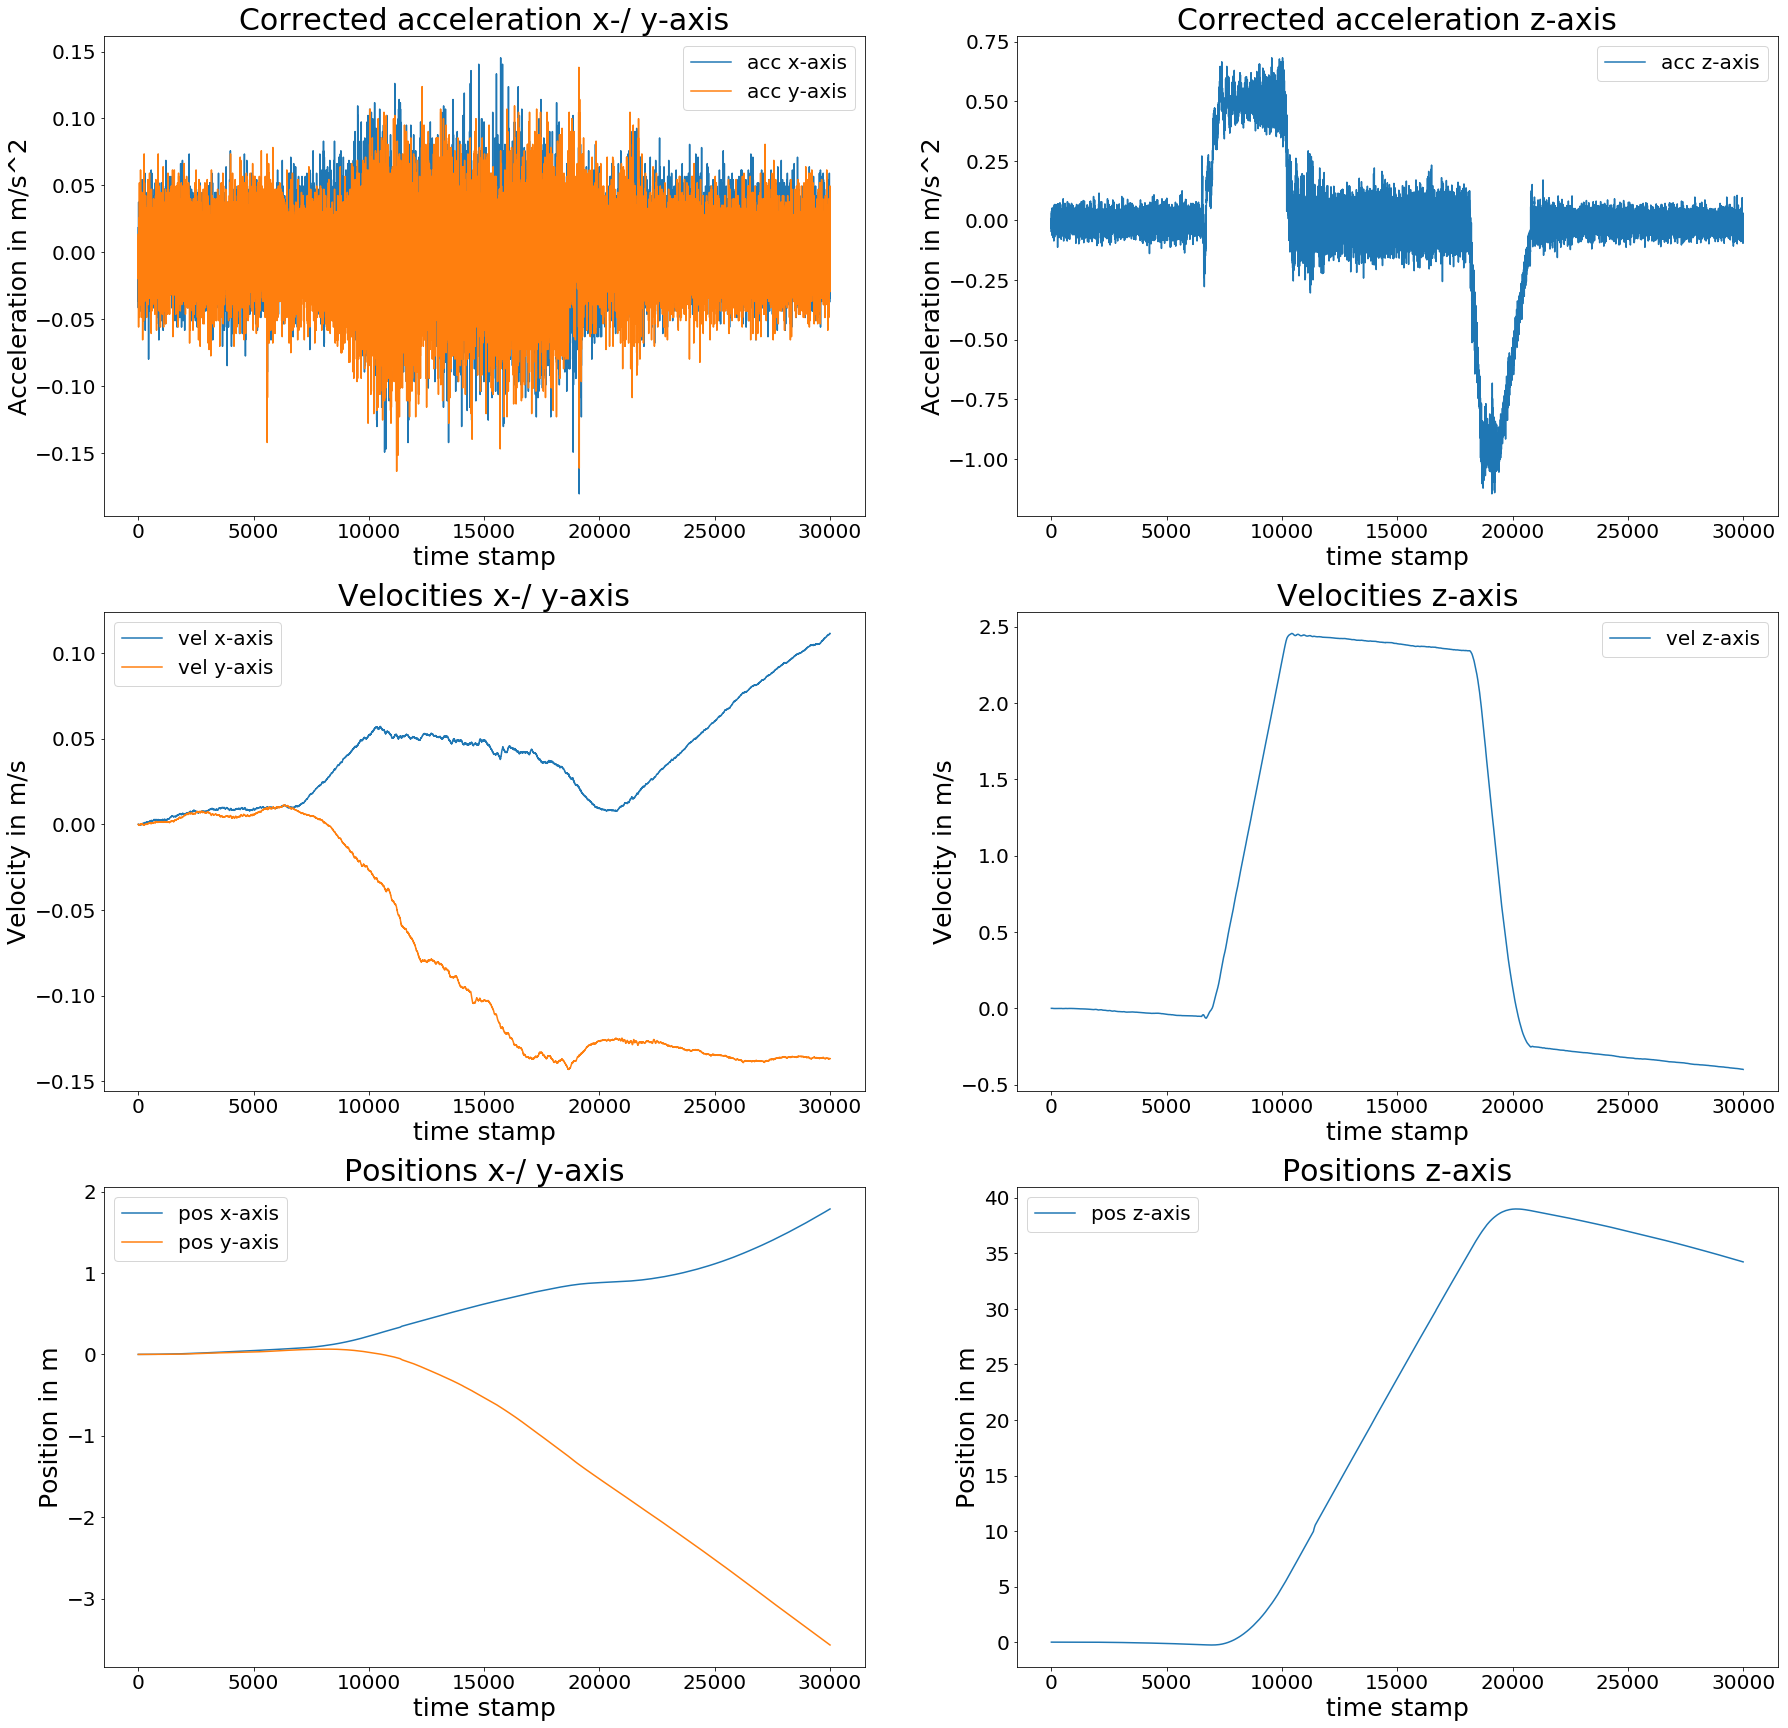

Run 7
Max height: 41.229198m


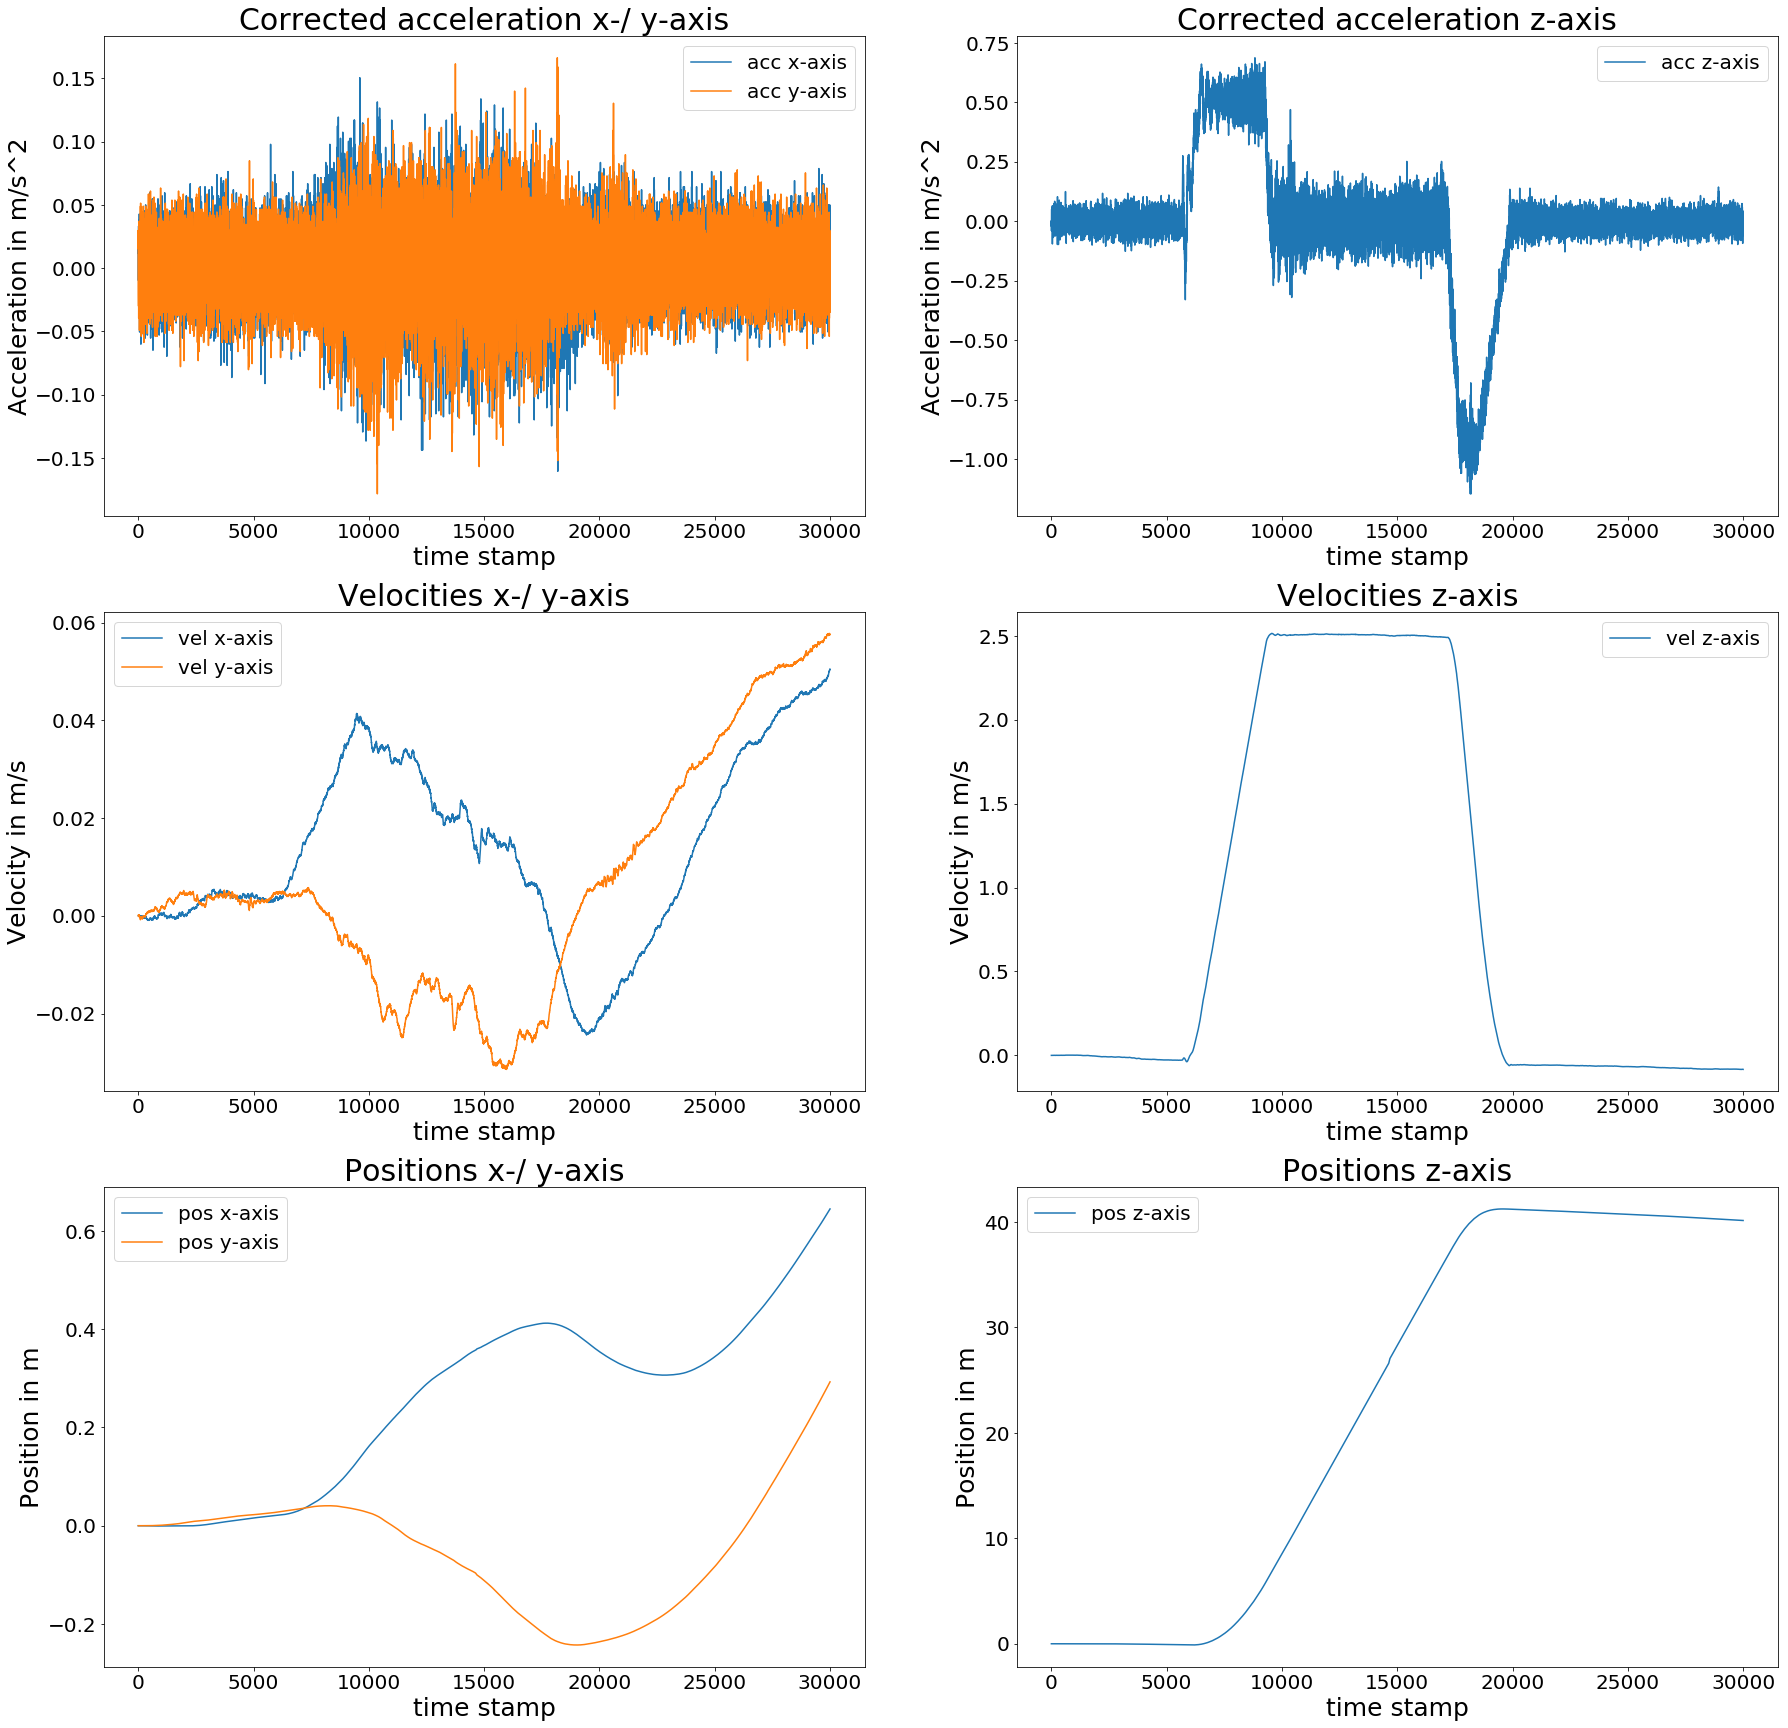

In [13]:
for run in range(7):
    print("Run %d" % (run + 1))
    run_dict = imu_data[run]
    acc_cx, acc_cy, acc_cz = extract_corr_acc(run_dict)
    vel_x, vel_y, vel_z = extract_vel(run_dict)
    pos_x, pos_y, pos_z = extract_pos(run_dict)
    
    f, axarr = plt.subplots(3, 2, figsize=(30,30))
    # plot corrected accelerations
    axarr[0, 0].plot(acc_cx, label='acc x-axis')
    axarr[0, 0].plot(acc_cy, label='acc y-axis')
    axarr[0, 0].set_title('Corrected acceleration x-/ y-axis', fontsize=30)
    axarr[0, 0].set_xlabel('time stamp', fontsize=25)
    axarr[0, 0].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[0, 0].legend(prop={'size': 20})
    
    axarr[0, 1].plot(acc_cz, label='acc z-axis')
    axarr[0, 1].set_title('Corrected acceleration z-axis', fontsize=30)
    axarr[0, 1].set_xlabel('time stamp', fontsize=25)
    axarr[0, 1].set_ylabel('Acceleration in m/s^2', fontsize=25)
    axarr[0, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[0, 1].legend(prop={'size': 20})
    
    # plot velocities
    axarr[1, 0].plot(vel_x, label='vel x-axis')
    axarr[1, 0].plot(vel_y, label='vel y-axis')
    axarr[1, 0].set_title('Velocities x-/ y-axis', fontsize=30)
    axarr[1, 0].set_xlabel('time stamp', fontsize=25)
    axarr[1, 0].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[1, 0].legend(prop={'size': 20})
    
    axarr[1, 1].plot(vel_z, label='vel z-axis')
    axarr[1, 1].set_title('Velocities z-axis', fontsize=30)
    axarr[1, 1].set_xlabel('time stamp', fontsize=25)
    axarr[1, 1].set_ylabel('Velocity in m/s', fontsize=25)
    axarr[1, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[1, 1].legend(prop={'size': 20})
    
    # plot position
    axarr[2, 0].plot(pos_x, label='pos x-axis')
    axarr[2, 0].plot(pos_y, label='pos y-axis')
    axarr[2, 0].set_title('Positions x-/ y-axis', fontsize=30)
    axarr[2, 0].set_xlabel('time stamp', fontsize=25)
    axarr[2, 0].set_ylabel('Position in m', fontsize=25)
    axarr[2, 0].tick_params(axis='both', which='major', labelsize=20)
    axarr[2, 0].legend(prop={'size': 20})
    
    axarr[2, 1].plot(pos_z, label='pos z-axis')
    axarr[2, 1].set_title('Positions z-axis', fontsize=30)
    axarr[2, 1].set_xlabel('time stamp', fontsize=25)
    axarr[2, 1].set_ylabel('Position in m', fontsize=25)
    axarr[2, 1].tick_params(axis='both', which='major', labelsize=20)
    axarr[2, 1].legend(prop={'size': 20})
    
    print("Max height: %fm" % pos_z.max())

    plt.show()